# 01. Prepare Problem

## Question : 

Apply machine learning algorithm to predict the survial of onboarding passengers

> ### Load Libraries

In [4]:
import pandas as pd
import numpy as np

import os
os.chdir("D:\\data\\titanic")

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#import partner as ally

> ### Load Data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

# 02. Prepare Data

> ### Data Cleaning and Imputation

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
ally.eda.print_null_cntNpct([train,test])

Total Missing Features : 3.

          Missing_Count  Missing_Percentage
Cabin               687            0.771044
Age                 177            0.198653
Embarked              2            0.002245
Total Missing Features : 3.

       Missing_Count  Missing_Percentage
Cabin            327            0.782297
Age               86            0.205742
Fare               1            0.002392
All Missing Column  in the data frames : 

{'Embarked', 'Cabin', 'Fare', 'Age'}


In [5]:
train[train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


**Filling Embarkment**

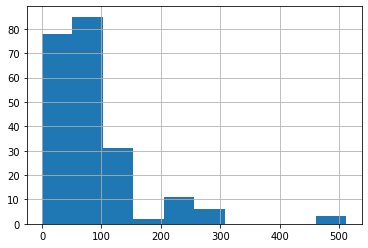

In [13]:
p = train[train.Pclass == 1]['Fare'].hist()

In [14]:
# Lets find out Embarkment of passanger who is in 1st class and have paid nearly 80.0 Fare 
train.groupby(by=['Pclass','Embarked'])['Fare'].median()

Pclass  Embarked
1       C           78.2667
        Q           90.0000
        S           52.0000
2       C           24.0000
        Q           12.3500
        S           13.5000
3       C            7.8958
        Q            7.7500
        S            8.0500
Name: Fare, dtype: float64

In [15]:
# It seems like these ladied Embarked at 'C'
train.Embarked.fillna('S',inplace=True)

**Filling Fare**

In [16]:
test[test['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [22]:
train[(train.Pclass == 3) & (train.Embarked == 'S') & (train.Sex == 'male') & (train.SibSp == 0) & (train.Parch == 0)]['Fare'].median()

7.8958

In [23]:
# lets find the fare for 3rd class who embarked at S :: Using above table -- its 8.0
test.Fare.fillna(8,inplace=True)

In [24]:
ally.eda.print_null_cntNpct([train,test])

Total Missing Features : 2.

       Missing_Count  Missing_Percentage
Cabin            687            0.771044
Age              177            0.198653
Total Missing Features : 2.

       Missing_Count  Missing_Percentage
Cabin            327            0.782297
Age               86            0.205742
All Missing Column  in the data frames : 

{'Cabin', 'Age'}


**Filling Age**

In [25]:
# Adding missing indicator
train['Age_NA'] = np.where(train.Age.isnull(),1,0)
test['Age_NA'] = np.where(test.Age.isnull(),1,0)

Skewness for Age is : 0.38910778230082704


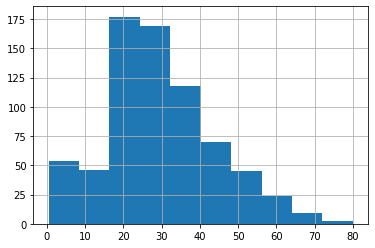

In [26]:
# lets look at the distribution and skewness
train.Age.hist()
print(f"Skewness for Age is : {train.Age.skew()}")

In [27]:
train[train.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,1
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,1
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,1
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,1


In [28]:
age_missing_idx = train[train.Age.isnull()].index

In [29]:
# filling Age by taking median value of Age after grouping passenger with Pclass and Sex
train['Age'] = train.groupby(by=['Pclass','Sex'])['Age'].apply(lambda x : x.fillna(x.median()))
test['Age'] = test.groupby(by=['Pclass','Sex'])['Age'].apply(lambda x : x.fillna(x.median()))

In [30]:
train.iloc[age_missing_idx.tolist(),:]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,NaN,Q,1
17,18,1,2,"Williams, Mr. Charles Eugene",male,30.0,0,0,244373,13.0000,NaN,S,1
19,20,1,3,"Masselmani, Mrs. Fatima",female,21.5,0,0,2649,7.2250,NaN,C,1
26,27,0,3,"Emir, Mr. Farred Chehab",male,25.0,0,0,2631,7.2250,NaN,C,1
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,21.5,0,0,330959,7.8792,NaN,Q,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,25.0,0,0,2629,7.2292,NaN,C,1
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,21.5,8,2,CA. 2343,69.5500,NaN,S,1
868,869,0,3,"van Melkebeke, Mr. Philemon",male,25.0,0,0,345777,9.5000,NaN,S,1
878,879,0,3,"Laleff, Mr. Kristo",male,25.0,0,0,349217,7.8958,NaN,S,1


**Filling Cabin**

In [31]:
# get only the 1st letter of the cabin as it denote the category of deck, if the value is missing then fill it with M
train['Cabin'] = train['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'M')
test['Cabin'] = test['Cabin'].apply(lambda x: x[0] if pd.notnull(x) else 'M')

In [32]:
ally.eda.print_null_cntNpct([train,test])

Total Missing Features : 0.

Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []
Total Missing Features : 0.

Empty DataFrame
Columns: [Missing_Count, Missing_Percentage]
Index: []
All Missing Column  in the data frames : 

set()


Now all the missing values are taken care

In [33]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,0


In [34]:
train.shape

(891, 13)

In [35]:
test.shape

(418, 12)

> ### Outlier Handling

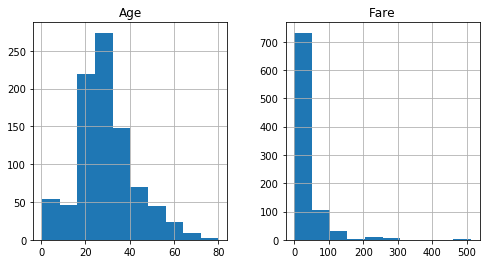

In [36]:
# Age and Fare are the continuous variable and may have some outliers. lets look into this
plt.rcParams['figure.figsize']=(8,4)
train[['Age','Fare']].hist()
plt.show()

Age have a range of 0 to 80 which looks like normal however Fare is highly right skewed and some passenger have paid over 500 

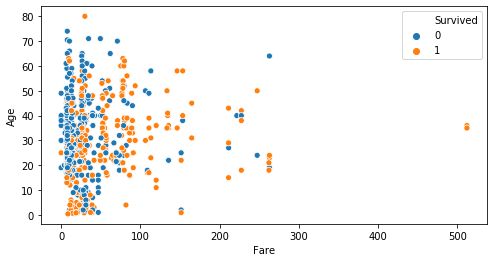

In [37]:
ax = sns.scatterplot(data=train,x='Fare',y='Age',hue='Survived')

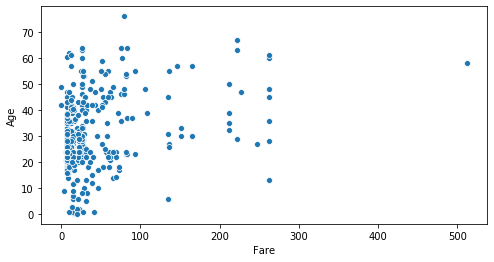

In [38]:
ax = sns.scatterplot(data=test,x='Fare',y='Age')

In [39]:
from sklearn.ensemble import IsolationForest

In [40]:
clf = IsolationForest(max_samples=100,contamination=0.005, random_state=0)

In [41]:
clf.fit(train[['Age','Fare']])

IsolationForest(behaviour='deprecated', bootstrap=False, contamination=0.005,
                max_features=1.0, max_samples=100, n_estimators=100,
                n_jobs=None, random_state=0, verbose=0, warm_start=False)

In [42]:
outlier = clf.predict(train[['Age','Fare']])

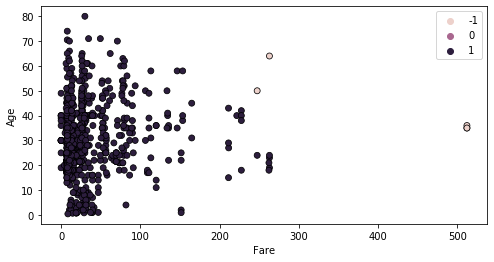

In [46]:
ax = sns.scatterplot(data=train,x='Fare',y='Age',hue=outlier,edgecolor='k')

In [47]:
pd.Series(outlier).value_counts()

 1    886
-1      5
dtype: int64

Lets get rid of these 0.5% outliers in training data

In [48]:
train = train[outlier == 1]

In [49]:
train.shape

(886, 13)

In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,M,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,M,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,M,S,0


In [51]:
# explore the cluster
train.Survived.value_counts()

0    548
1    338
Name: Survived, dtype: int64

In [52]:
train.to_csv('train_imputed.csv',index=False)
test.to_csv('test_imputed.csv',index=False)

In [5]:
train = pd.read_csv("train_imputed.csv")
test = pd.read_csv("test_imputed.csv")

In [6]:
print(train.shape)
print(test.shape)

(886, 13)
(418, 12)


this data is free from outliers

In [7]:
train.Survived.value_counts(normalize=True)

0    0.61851
1    0.38149
Name: Survived, dtype: float64

# 03. Exploratory Data Analysis

In [5]:
bkp = train.copy()

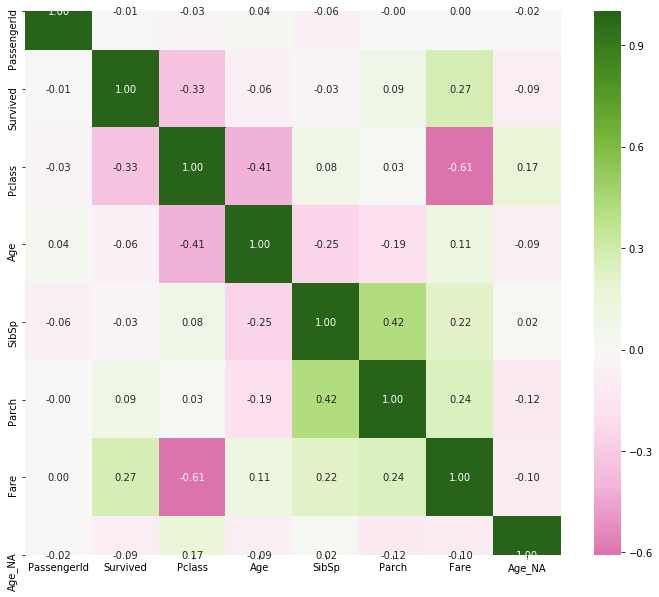

In [6]:
plt.rcParams['figure.figsize']=(12,10)
p = sns.heatmap(train.corr(),center=0,annot=True,fmt='.2f',cmap='PiYG')

# 04. Feature Engineering

> ### Data Discovery

**FamilySize**

In [8]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

**indict**

In [9]:
indict_map = train.groupby(by=['Pclass','Cabin','Embarked','Sex'])['Survived'].mean().round(1).to_dict()

In [10]:
train['indict'] = [indict_map.get(i) 
                                  for i in zip(train['Pclass'],train['Cabin'],train['Embarked'],train['Sex'])]

test['indict'] = [indict_map.get(i) 
                                  for i in zip(test['Pclass'],test['Cabin'],test['Embarked'],test['Sex'])]

In [11]:
test[test.isnull().any(axis=1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA,FamilySize,indict
288,1180,3,"Mardirosian, Mr. Sarkis",male,24.0,0,0,2655,7.2292,F,C,1,1,NaN
321,1213,3,"Krekorian, Mr. Neshan",male,25.0,0,0,2654,7.2292,F,C,0,1,NaN
374,1266,1,"Dodge, Mrs. Washington (Ruth Vidaver)",female,54.0,1,1,33638,81.8583,A,S,0,3,NaN


In [12]:
#train.groupby(by=['Pclass','Sex','Cabin','Embarked'])['Survived'].agg(['mean','count']).sort_values('mean')

In [18]:
#ally.eda.print_null_cntNpct([test])

In [19]:
test.indict.fillna(0.5, inplace=True)

**Ticket**

In [20]:
# extraction
train.Ticket = train.Ticket.str.split(' ',expand=True)[0].str.split('/',expand=True)[0].str.split('.',expand=True)[0]
test.Ticket = test.Ticket.str.split(' ',expand=True)[0].str.split('/',expand=True)[0].str.split('.',expand=True)[0]

In [21]:
# Encoding
train.Ticket = train.Ticket.apply(lambda x: 'M' if x.isnumeric() else x)
test.Ticket = test.Ticket.apply(lambda x: 'M' if x.isnumeric() else x)

In [22]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA,FamilySize,indict
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A,7.2500,M,S,0,2,0.1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC,71.2833,C,C,0,2,0.9
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON,7.9250,M,S,0,1,0.4
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,M,53.1000,C,S,0,2,0.9
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,M,8.0500,M,S,0,1,0.1


In [23]:
train.Ticket.value_counts()

M        660
PC        56
C         33
A         28
STON      18
SOTON     17
S         14
CA        14
SC        13
W         11
F          6
LINE       4
PP         3
WE         2
P          2
Fa         1
SW         1
SO         1
SCO        1
A4         1
Name: Ticket, dtype: int64

In [24]:
# mapping
ticket_map = train.groupby(by = ['Ticket'])['Survived'].mean().round(2).to_dict()
train.Ticket = train.Ticket.map(ticket_map)
test.Ticket = test.Ticket.map(ticket_map).fillna(0)

In [25]:
train.Ticket.value_counts().sort_index()

0.00      3
0.07     42
0.09     11
0.12     17
0.14     14
0.25      4
0.38    660
0.44     18
0.45     33
0.50      4
0.54     13
0.62     56
0.67      9
1.00      2
Name: Ticket, dtype: int64

**Family per Sex survival ratio**

In [26]:
FamilySex_map = train.groupby(by=['FamilySize','Sex'])['Survived'].mean().round(2).to_dict()

In [27]:
train['FamilySex'] = [FamilySex_map.get(i) for i in zip(train['FamilySize'],train['Sex'])]
test['FamilySex'] = [FamilySex_map.get(i) for i in zip(test['FamilySize'],test['Sex'])]

**Salutation & Surname**

In [28]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA,FamilySize,indict,FamilySex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,0.07,7.2500,M,S,0,2,0.1,0.23
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,0.62,71.2833,C,C,0,2,0.9,0.81
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,0.44,7.9250,M,S,0,1,0.4,0.78
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,0.38,53.1000,C,S,0,2,0.9,0.81
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,0.38,8.0500,M,S,0,1,0.1,0.15


In [29]:
# Extraction Name and Surname
train['Salutation'] = train.Name.str.split('.',expand=True)[0].str.split(', ',expand=True)[1]
test['Salutation'] = test.Name.str.split('.',expand=True)[0].str.split(', ',expand=True)[1]

train['Surname'] = train.Name.str.split('.',expand=True)[0].str.split(', ',expand=True)[0]
test['Surname'] = test.Name.str.split('.',expand=True)[0].str.split(', ',expand=True)[0]

**Surname mapping for Familysize > 4**

In [30]:
# map of all those whose surname > 4 ? why - as we can see less survival chances for them
surname_gt4 = train.Surname.value_counts().index[train.Surname.value_counts().values>4]
surname_gt4 = surname_gt4.tolist()

In [31]:
surname_gt4

['Andersson',
 'Sage',
 'Skoog',
 'Carter',
 'Panula',
 'Goodwin',
 'Johnson',
 'Rice']

In [32]:
SurnameSex_map = train[train.Surname.isin(surname_gt4)].groupby(by=['Surname','Sex'])['Survived'].mean().round(2)

In [33]:
train['SurnameSex'] = [SurnameSex_map.get(i) for i in zip(train['Surname'],train['Sex'])]
test['SurnameSex'] = [SurnameSex_map.get(i) for i in zip(test['Surname'],test['Sex'])]

In [28]:
ally.eda.print_null_cntNpct([train,test])

Total Missing Features : 1.

            Missing_Count  Missing_Percentage
SurnameSex            835            0.942438
Total Missing Features : 1.

            Missing_Count  Missing_Percentage
SurnameSex            409            0.978469
All Missing Column  in the data frames : 

{'SurnameSex'}


In [34]:
train.fillna(0,inplace=True)
test.fillna(0,inplace=True)

In [35]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA,FamilySize,indict,FamilySex,Salutation,Surname,SurnameSex
0,892,3,"Kelly, Mr. James",male,34.5,0,0,0.38,7.8292,M,Q,0,1,0.1,0.15,Mr,Kelly,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,0.38,7.0000,M,S,0,2,0.4,0.81,Mrs,Wilkes,0.0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,0.38,9.6875,M,Q,0,1,0.0,0.15,Mr,Myles,0.0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,0.38,8.6625,M,S,0,1,0.1,0.15,Mr,Wirz,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,0.38,12.2875,M,S,0,3,0.4,0.78,Mrs,Hirvonen,0.0


In [36]:
del train['Name']
del test['Name']

del train['Surname']
del test['Surname']

In [37]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA,FamilySize,indict,FamilySex,Salutation,SurnameSex
0,1,0,3,male,22.0,1,0,0.07,7.2500,M,S,0,2,0.1,0.23,Mr,0.0
1,2,1,1,female,38.0,1,0,0.62,71.2833,C,C,0,2,0.9,0.81,Mrs,0.0
2,3,1,3,female,26.0,0,0,0.44,7.9250,M,S,0,1,0.4,0.78,Miss,0.0
3,4,1,1,female,35.0,1,0,0.38,53.1000,C,S,0,2,0.9,0.81,Mrs,0.0
4,5,0,3,male,35.0,0,0,0.38,8.0500,M,S,0,1,0.1,0.15,Mr,0.0


> ### Variable Transformation

In [39]:
ally.eda.print_VariableTransformation(train,'Survived',['Age','Fare'])

In [40]:
train.Fare = np.log1p(train.Fare)
test.Fare = np.log1p(test.Fare)

 1 . Age  ( Correlation : -0.0621 )


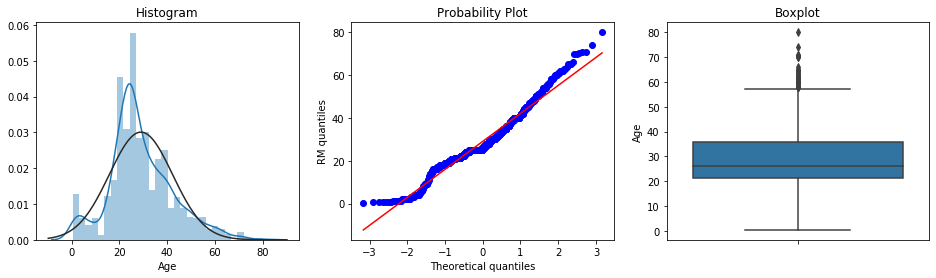

 2 . Fare  ( Correlation : 0.3243 )


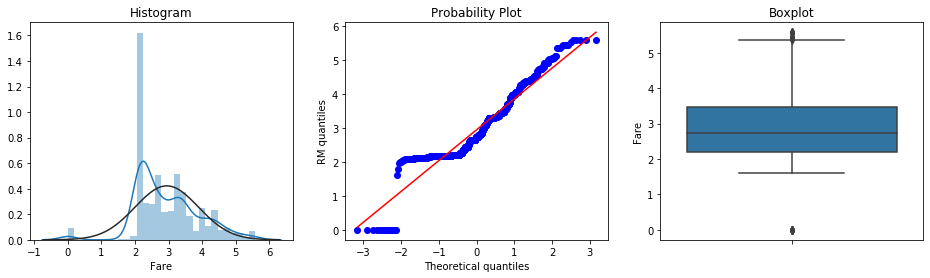

In [35]:
ally.display.NumericalDistribution(train,['Age','Fare'],'Survived')

In [41]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA,FamilySize,indict,FamilySex,Salutation,SurnameSex
0,1,0,3,male,22.0,1,0,0.07,2.110213,M,S,0,2,0.1,0.23,Mr,0.0
1,2,1,1,female,38.0,1,0,0.62,4.280593,C,C,0,2,0.9,0.81,Mrs,0.0
2,3,1,3,female,26.0,0,0,0.44,2.188856,M,S,0,1,0.4,0.78,Miss,0.0
3,4,1,1,female,35.0,1,0,0.38,3.990834,C,S,0,2,0.9,0.81,Mrs,0.0
4,5,0,3,male,35.0,0,0,0.38,2.202765,M,S,0,1,0.1,0.15,Mr,0.0


In [42]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA,FamilySize,indict,FamilySex,Salutation,SurnameSex
0,892,3,male,34.5,0,0,0.38,2.178064,M,Q,0,1,0.1,0.15,Mr,0.0
1,893,3,female,47.0,1,0,0.38,2.079442,M,S,0,2,0.4,0.81,Mrs,0.0
2,894,2,male,62.0,0,0,0.38,2.369075,M,Q,0,1,0.0,0.15,Mr,0.0
3,895,3,male,27.0,0,0,0.38,2.268252,M,S,0,1,0.1,0.15,Mr,0.0
4,896,3,female,22.0,1,1,0.38,2.586824,M,S,0,3,0.4,0.78,Mrs,0.0


> ### Categorical Encoding

In [43]:
train.Pclass.replace(1,'First',inplace=True)
train.Pclass.replace(2,'Second',inplace=True)
train.Pclass.replace(3,'Third',inplace=True)

test.Pclass.replace(1,'First',inplace=True)
test.Pclass.replace(2,'Second',inplace=True)
test.Pclass.replace(3,'Third',inplace=True)

In [44]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA,FamilySize,indict,FamilySex,Salutation,SurnameSex
0,1,0,Third,male,22.0,1,0,0.07,2.110213,M,S,0,2,0.1,0.23,Mr,0.0
1,2,1,First,female,38.0,1,0,0.62,4.280593,C,C,0,2,0.9,0.81,Mrs,0.0
2,3,1,Third,female,26.0,0,0,0.44,2.188856,M,S,0,1,0.4,0.78,Miss,0.0
3,4,1,First,female,35.0,1,0,0.38,3.990834,C,S,0,2,0.9,0.81,Mrs,0.0
4,5,0,Third,male,35.0,0,0,0.38,2.202765,M,S,0,1,0.1,0.15,Mr,0.0


In [45]:
one = ['Pclass','Sex','Cabin','Embarked','Salutation']

In [46]:
feature = test.columns.tolist()

In [47]:
feature.remove('PassengerId')

In [48]:
feature

['Pclass',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Age_NA',
 'FamilySize',
 'indict',
 'FamilySex',
 'Salutation',
 'SurnameSex']

In [49]:
test.loc[test[test.Salutation == 'Dona'].index,['Salutation']] = 'Don'

In [50]:
test[test.Salutation == 'Dona']

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_NA,FamilySize,indict,FamilySex,Salutation,SurnameSex


In [52]:
from feature_engine.categorical_encoders import OneHotCategoricalEncoder
ohe = OneHotCategoricalEncoder(variables=one)
ohe.fit(train[feature])

OneHotCategoricalEncoder(drop_last=False, top_categories=None,
                         variables=['Pclass', 'Sex', 'Cabin', 'Embarked',
                                    'Salutation'])

In [53]:
test_t = ohe.transform(test[feature])

In [54]:
train_t = ohe.transform(train[feature])

In [55]:
ally.eda.print_null_cntNpct([train_t,test_t])

NameError: name 'ally' is not defined

> ### Discreatization

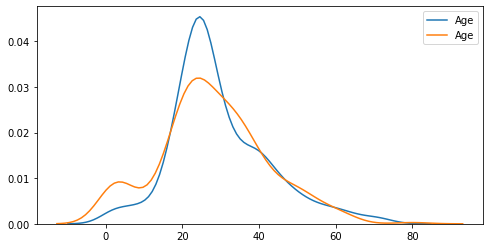

In [56]:
plt.rcParams['figure.figsize'] = (8,4)
sns.kdeplot(data=train[train.Survived==0]['Age'])
sns.kdeplot(data=train[train.Survived==1]['Age'])

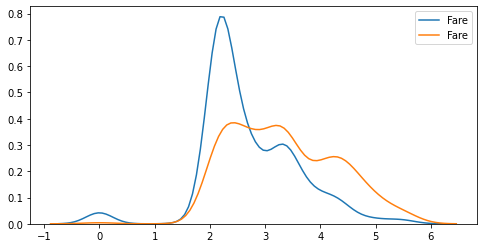

In [57]:
plt.rcParams['figure.figsize'] = (8,4)
sns.kdeplot(data=train[train.Survived==0]['Fare'])
sns.kdeplot(data=train[train.Survived==1]['Fare'])

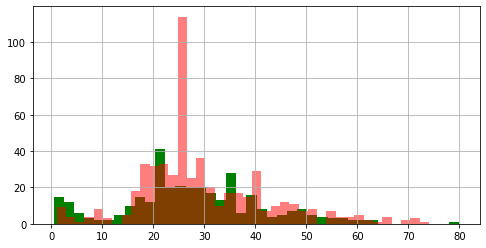

In [58]:
b= 40
train[train.Survived==1]['Age'].hist(bins=b,color='green')
train[train.Survived==0]['Age'].hist(bins=b,color='r',alpha=0.5)

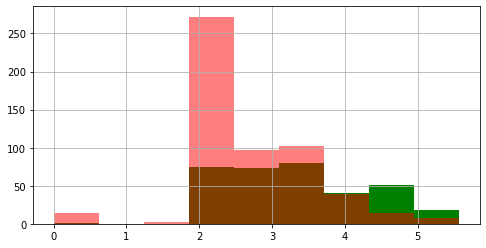

In [59]:
b= 9
train[train.Survived==1]['Fare'].hist(bins=b,color='green')
train[train.Survived==0]['Fare'].hist(bins=b,color='r',alpha=0.5)

In [60]:
from feature_engine.discretisers import EqualWidthDiscretiser
age_dsc = EqualWidthDiscretiser(bins=40,variables=['Age'])
fare_dsc = EqualWidthDiscretiser(bins=9,variables=['Fare'])

age_dsc.fit(train_t)
fare_dsc.fit(train_t)

EqualWidthDiscretiser(bins=9, return_object=False, variables=['Fare'])

In [61]:
train_t = age_dsc.transform(train_t)
test_t = age_dsc.transform(test_t)

In [62]:
train_t = fare_dsc.transform(train_t)
test_t = fare_dsc.transform(test_t)

In [63]:
x = train_t
y = train['Survived']

> ### Scaling

> ### Feature Selection

# 04. Evaluate Algorithms

In [64]:
features = train_t.columns.tolist()

In [65]:
features

['Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Age_NA',
 'FamilySize',
 'indict',
 'FamilySex',
 'SurnameSex',
 'Pclass_Third',
 'Pclass_First',
 'Pclass_Second',
 'Sex_male',
 'Sex_female',
 'Cabin_M',
 'Cabin_C',
 'Cabin_E',
 'Cabin_G',
 'Cabin_D',
 'Cabin_A',
 'Cabin_B',
 'Cabin_F',
 'Cabin_T',
 'Embarked_S',
 'Embarked_C',
 'Embarked_Q',
 'Salutation_Mr',
 'Salutation_Mrs',
 'Salutation_Miss',
 'Salutation_Master',
 'Salutation_Don',
 'Salutation_Rev',
 'Salutation_Dr',
 'Salutation_Mme',
 'Salutation_Ms',
 'Salutation_Major',
 'Salutation_Lady',
 'Salutation_Sir',
 'Salutation_Mlle',
 'Salutation_Col',
 'Salutation_Capt',
 'Salutation_the Countess',
 'Salutation_Jonkheer']

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x[features], y, test_size=0.2, random_state=42)

>  ### Linear Models

>> * #### Scaled Models

>> * #### Non-Scaled Models

**RidgeClassifier**

In [74]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_validate
clf = RidgeClassifier(class_weight='balanced')

In [71]:
clf.fit(x_train,y_train)
ypred = clf.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       107
           1       0.83      0.80      0.81        71

    accuracy                           0.85       178
   macro avg       0.85      0.85      0.85       178
weighted avg       0.85      0.85      0.85       178



In [72]:
cross_validate(clf,x,y,cv=5,scoring=['accuracy','recall','precision'])

{'fit_time': array([0.00487709, 0.0051856 , 0.00614667, 0.00418401, 0.00423741]),
 'score_time': array([0.00409031, 0.00406837, 0.00358963, 0.00299168, 0.00418568]),
 'test_accuracy': array([0.83146067, 0.81355932, 0.82485876, 0.83050847, 0.87570621]),
 'test_recall': array([0.80882353, 0.76119403, 0.7761194 , 0.69117647, 0.83823529]),
 'test_precision': array([0.76388889, 0.75      , 0.76470588, 0.83928571, 0.83823529])}

In [75]:
confusion_matrix(y_test,ypred)

array([[95, 12],
       [14, 57]], dtype=int64)

> ### Non-Linear Models

In [233]:
from sklearn.multiclass import OneVsOneClassifier,OneVsRestClassifier,OutputCodeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB,ComplementNB
from sklearn.svm import SVC,NuSVC,OneClassSVM,LinearSVC 

>> * #### Scaled Models

>> * #### Non-Scaled Models

In [570]:
clf = LogisticRegression(class_weight='balanced')

In [571]:
clf.fit(x_train,y_train)
ypred = clf.predict(x_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       107
           1       0.80      0.85      0.82        71

    accuracy                           0.85       178
   macro avg       0.85      0.85      0.85       178
weighted avg       0.86      0.85      0.85       178



In [572]:
cross_validate(clf,x,y,cv=5,scoring=['accuracy','recall','precision'])

{'fit_time': array([0.03323579, 0.03395891, 0.03169847, 0.03120947, 0.03104901]),
 'score_time': array([0.00459003, 0.00375152, 0.00359845, 0.00348949, 0.00387454]),
 'test_accuracy': array([0.82022472, 0.79661017, 0.81355932, 0.81920904, 0.8700565 ]),
 'test_recall': array([0.83823529, 0.76119403, 0.8358209 , 0.69117647, 0.85294118]),
 'test_precision': array([0.73076923, 0.71830986, 0.71794872, 0.81034483, 0.81690141])}

In [573]:
confusion_matrix(y_test,ypred)

array([[92, 15],
       [11, 60]], dtype=int64)

In [574]:
from sklearn.ensemble import BaggingClassifier

**Bagging with Base estimation**

In [575]:
clf = BaggingClassifier(base_estimator=LogisticRegression())
clf.fit(x_train,y_train)

ypred = clf.predict(x_test)
print(classification_report(y_test,ypred))
print(confusion_matrix(y_test,ypred))
cross_validate(clf,x,y,cv=5,scoring=['accuracy','recall','precision'])

              precision    recall  f1-score   support

           0       0.84      0.91      0.87       107
           1       0.84      0.73      0.78        71

    accuracy                           0.84       178
   macro avg       0.84      0.82      0.83       178
weighted avg       0.84      0.84      0.83       178

[[97 10]
 [19 52]]


{'fit_time': array([0.4534483 , 0.57663941, 0.67258024, 0.64841986, 0.62311792]),
 'score_time': array([0.00755882, 0.01017046, 0.01360941, 0.01008439, 0.00633717]),
 'test_accuracy': array([0.80898876, 0.82485876, 0.83615819, 0.81355932, 0.8700565 ]),
 'test_recall': array([0.72058824, 0.71641791, 0.7761194 , 0.66176471, 0.82352941]),
 'test_precision': array([0.765625  , 0.8       , 0.78787879, 0.81818182, 0.8358209 ])}

**Threshold Moving**

In [94]:
from sklearn.metrics import roc_curve,confusion_matrix
ypred = clf.predict_proba(x_test)
yhat = ypred[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, yhat)

Best Threshold=0.349749, G-Mean=0.784


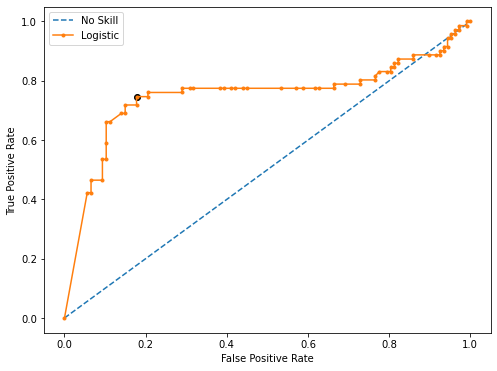

In [95]:
plt.rcParams['figure.figsize']=(8,6)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()

# calculate the g-mean for each threshold
gmeans  =  np.sqrt(tpr *  (1-fpr))

#Once calculated, we can locate the index for the largest G-mean score and use that index to determine which threshold value to use
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

# Plot it on the ROC-AUC curve
plt.scatter(fpr[ix],  tpr[ix],  marker='o',  color='black',  label='Best')

# show the plot
plt.show()

In [578]:
ypred = clf.predict_proba(x_test)

ypred = [1 if i > 0.39 else 0 for i in ypred[:,1].tolist()]

print(classification_report(y_test,ypred))
cross_validate(clf,x,y,cv=5,scoring=['accuracy','recall','precision'])

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       107
           1       0.79      0.85      0.82        71

    accuracy                           0.85       178
   macro avg       0.84      0.85      0.84       178
weighted avg       0.85      0.85      0.85       178



{'fit_time': array([0.34622025, 0.68741894, 0.41809869, 0.3515358 , 0.59907532]),
 'score_time': array([0.01158261, 0.01365066, 0.00878191, 0.00712156, 0.00911903]),
 'test_accuracy': array([0.82022472, 0.81920904, 0.84745763, 0.83050847, 0.8700565 ]),
 'test_recall': array([0.75      , 0.71641791, 0.7761194 , 0.67647059, 0.80882353]),
 'test_precision': array([0.77272727, 0.78688525, 0.8125    , 0.85185185, 0.84615385])}

In [579]:
confusion_matrix(y_test,ypred)

array([[91, 16],
       [11, 60]], dtype=int64)

**Calibrated**

In [580]:
from sklearn.calibration import CalibratedClassifierCV
#calibrated = CalibratedClassifierCV(clf, method='sigmoid', cv=3)
calibrated = CalibratedClassifierCV(clf, method='isotonic', cv=3)

calibrated.fit(x_train, y_train)

ypred = calibrated.predict(x_test)
print(classification_report(y_test,ypred))
cross_validate(clf,x,y,cv=5,scoring=['accuracy','recall','precision'])
confusion_matrix(y_test,ypred)

              precision    recall  f1-score   support

           0       0.86      0.92      0.89       107
           1       0.86      0.77      0.81        71

    accuracy                           0.86       178
   macro avg       0.86      0.85      0.85       178
weighted avg       0.86      0.86      0.86       178



array([[98,  9],
       [16, 55]], dtype=int64)

**Submission**

In [581]:
clf.fit(x[features], y)

BaggingClassifier(base_estimator=LogisticRegression(C=1.0, class_weight=None,
                                                    dual=False,
                                                    fit_intercept=True,
                                                    intercept_scaling=1,
                                                    l1_ratio=None, max_iter=100,
                                                    multi_class='auto',
                                                    n_jobs=None, penalty='l2',
                                                    random_state=None,
                                                    solver='lbfgs', tol=0.0001,
                                                    verbose=0,
                                                    warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None,

In [569]:
ypred = clf.predict_proba(test_t[features])
ypred = [1 if i > 0.39 else 0 for i in ypred[:,1].tolist()]

a = pd.DataFrame(test['PassengerId'])
a['Survived'] = pd.DataFrame(ypred)
a.to_csv("submit.csv", index=False)

Score : 0.78468